# Wine Classification

## Information about data
Models will be trained on data about wine containing 13 features and target class. It comes from UC Invine Machine Learning Repository: https://archive.ics.uci.edu/dataset/109/wine.

**Features:**

| ID | Name                 | Type       |
| -- | -------------------- | ---------- |
| 1  | Alcohol              | Continuous |
| 2  | Malis acid           | Continuous |
| 3  | Ash                  | Continuous |
| 4  | Alcanity of ash      | Continuous |
| 5  | Magnesium            | Integer    |
| 6  | Total phenols        | Continuous |
| 7  | Flavanoids           | Continuous |
| 8  | Nonflavanoid phenols | Continuous |
| 9  | Proanthocyanins      | Continuous |
| 10 | Color intensity      | Continuous |
| 11 | Hue                  | Continuous |
| 12 | OD280/OD315          | Continuous |
| 13 | Proline              | Integer    |

**Target:** 1, 2 or 3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the data
wine_df = pd.read_csv('data/wine.data', header=None)

headers = [
    'Target',
    'Alcohol',
    'Malic acid',
    'Ash',
    'Alcalinity of ash',
    'Magnesium',
    'Total phenols',
    'Flavanoids',
    'Nonflavanoid phenols',
    'Proanthocyanins',
    'Color intensity',
    'Hue',
    'OD280/OD315',
    'Proline'
]
wine_df.columns = headers
wine_df.head()


,Target,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Check for missing data

In [3]:
wine_df.isna().sum()

Target                  0
Alcohol                 0
Malic acid              0
Ash                     0
Alcalinity of ash       0
Magnesium               0
Total phenols           0
Flavanoids              0
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         0
Hue                     0
OD280/OD315             0
Proline                 0
dtype: int64

## Correlation between features

<Axes: >

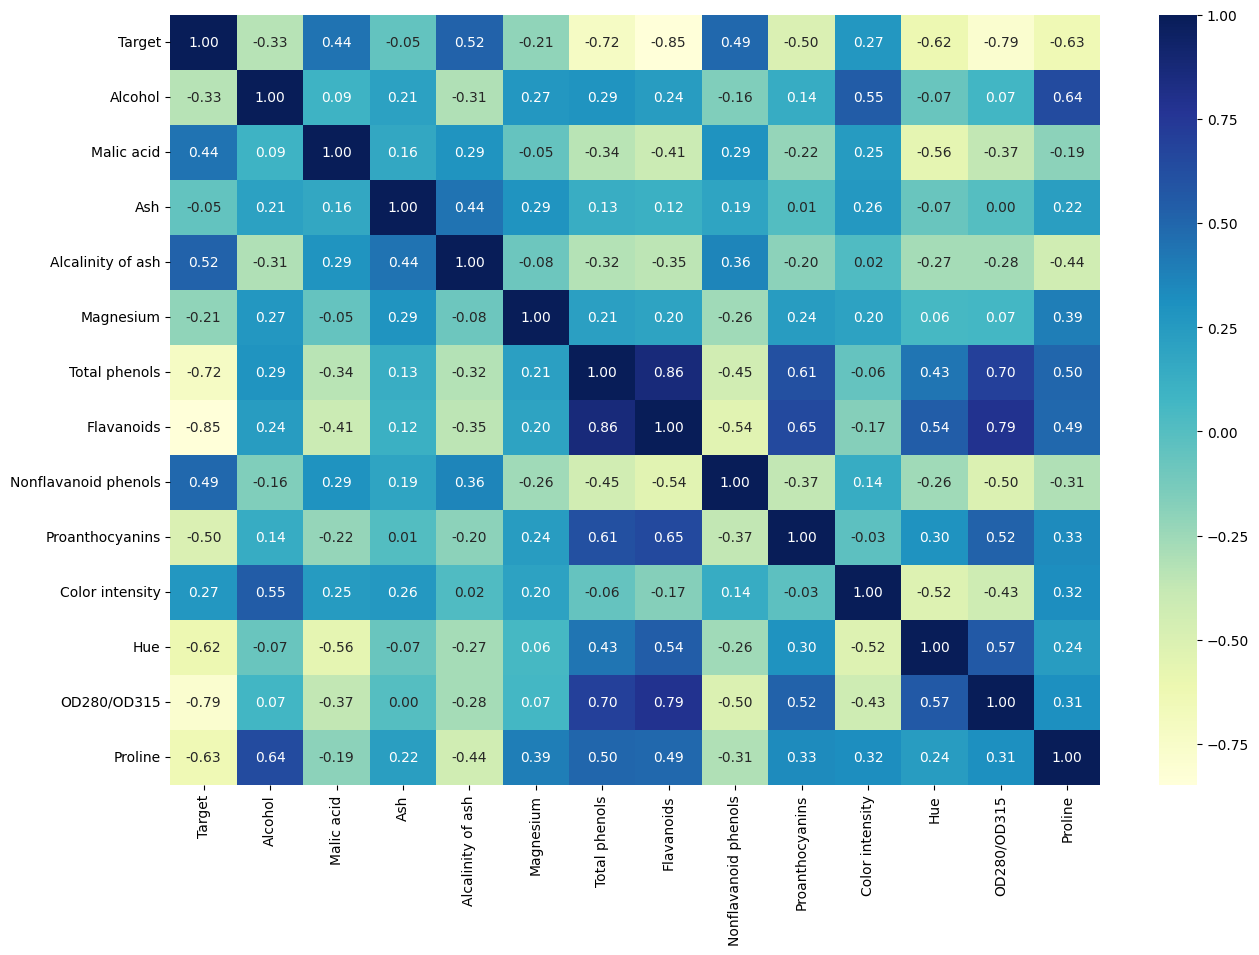

In [4]:
import seaborn as sns

corr_matrix = wine_df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='YlGnBu',
    fmt=".2f"
)

## Prepare models

In [5]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

models = {
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier()
}

## Separate features and targets

In [6]:
X = wine_df.drop('Target', axis=1)
y = wine_df['Target']

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=headers[1:])
X.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


## Implement usefull functions
#### 1. Cross validation models evaluation

In [7]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_models(models, X_train, y_train, random_state):
    model_results = {}
    for name, model in models.items():
        kf = KFold(n_splits=4, shuffle=True, random_state=random_state)

        accuracy = []
        precision = []
        recall = []
        f1 = []

        for train_ix, test_ix in kf.split(X):
            X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
            y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]

            model.fit(X_train, y_train)

            predictions = model.predict(X_test)

            accuracy.append(accuracy_score(y_test, predictions))
            precision.append(precision_score(y_test, predictions, average='weighted', zero_division=0))
            recall.append(recall_score(y_test, predictions, average='weighted'))
            f1.append(f1_score(y_test, predictions, average='weighted'))


        model_results[name] = {
            'params': model.get_params(),
            'accuracy': np.mean(accuracy),
            'precision': np.mean(precision),
            'recall': np.mean(recall),
            'f1': np.mean(f1)
        }
    return model_results

#### 2. Get results of all `n` models

In [8]:
def get_results(models, X, y, n=3):
    all_results = []
    for i in range(n):
        results = evaluate_models(models, X, y, i)
        all_results.append(results)
    return all_results

#### 3. Plot results of models

In [9]:
# def plot_results(results):
#     df = pd.DataFrame(results).T
#     ax = df.plot(kind='bar', figsize=(10, 6))
    
#     for p in ax.patches:
#         ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
#                     ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    
#     plt.title('Model Performance')
#     plt.ylabel('Score')
#     plt.xlabel('Model')
#     plt.xticks(rotation=0)
#     plt.show()

#### 4. Plot all results of models

In [10]:
def show_results(all_results):
    tested_svm_params = all_results[0]['SVM']['params']
    tested_dt_params = all_results[0]['Decision Tree']['params']

    print(f'SVM Params:')
    print(f'\tKernel: {tested_svm_params["kernel"]}')
    print(f'\tC: {tested_svm_params["C"]}')
    print(f'\tMax Iter: {tested_svm_params["max_iter"]}', end='\n\n')
    print(f'Decision Tree Params:')
    print(f'\tMax Depth: {tested_dt_params["max_depth"]}')
    print(f'\tCriterion: {tested_dt_params["criterion"]}')
    print(f'\tSplitter: {tested_dt_params["splitter"]}')

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    for i, result in enumerate(all_results):
        df = pd.DataFrame(result).T
        df.drop('params', axis=1, inplace=True)
        ax = df.plot(kind='bar', ax=axes[i])
        
        for p in ax.patches:
            ax.annotate(format(p.get_height() * 100, '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', xytext=(0, 5), textcoords='offset points')
        
        ax.set_title(f'Model {i+1} Performance [%]')
        ax.set_ylabel('Score')
        ax.set_xlabel('Model')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    
    plt.tight_layout()
    plt.show()


## Parameter testing
Define all the parameters that we would like to test

In [34]:
svm_params = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'max_iter': [-1, 1000, 10000, 100000]
}

dt_params = {
    'max_depth': [5, 10, 15],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

In [35]:
def examine_params(svm_params, dt_params):
    models = {
        'SVM': SVC(
            kernel=np.random.choice(svm_params['kernel']),
            C=np.random.choice(svm_params['C']),
            max_iter=np.random.choice(svm_params['max_iter'])
        ),
        'Decision Tree': DecisionTreeClassifier(
            max_depth=np.random.choice(dt_params['max_depth']),
            criterion=np.random.choice(dt_params['criterion']),
            splitter=np.random.choice(dt_params['splitter'])
        )
    }

    results = get_results(models, X, y)
    show_results(results)

SVM Params:
	Kernel: linear
	C: 1.0
	Max Iter: 10000

Decision Tree Params:
	Max Depth: 10
	Criterion: gini
	Splitter: random


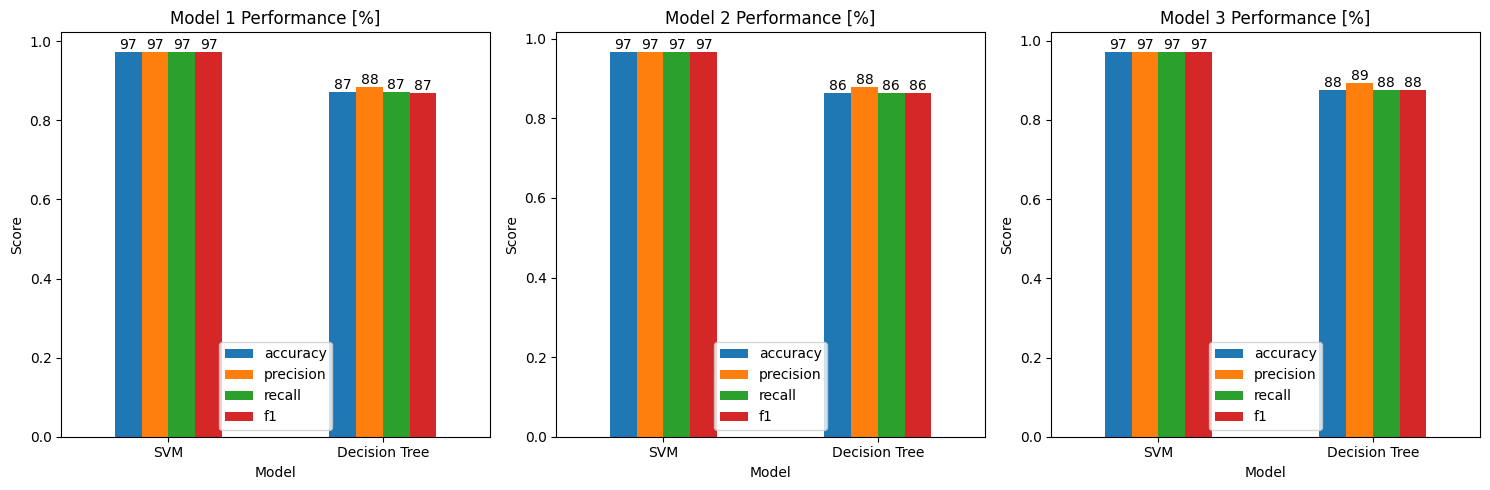

In [36]:
examine_params(svm_params, dt_params)

SVM Params:
	Kernel: rbf
	C: 10.0
	Max Iter: 1000

Decision Tree Params:
	Max Depth: 5
	Criterion: entropy
	Splitter: random


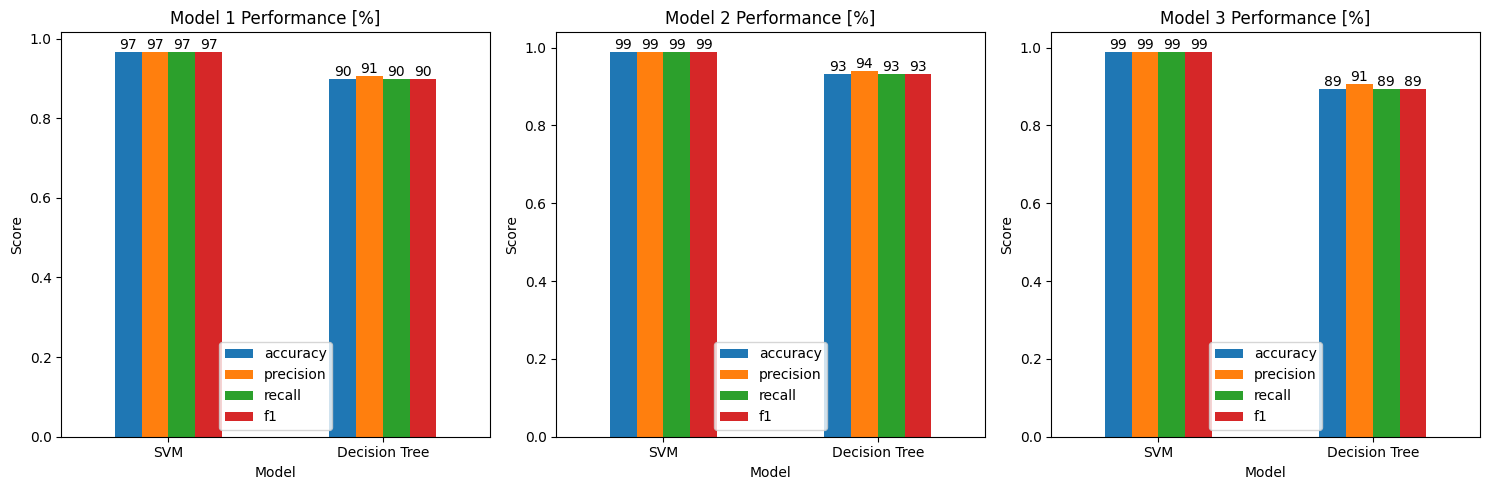

In [37]:
examine_params(svm_params, dt_params)

SVM Params:
	Kernel: poly
	C: 1.0
	Max Iter: 1000

Decision Tree Params:
	Max Depth: 5
	Criterion: gini
	Splitter: random


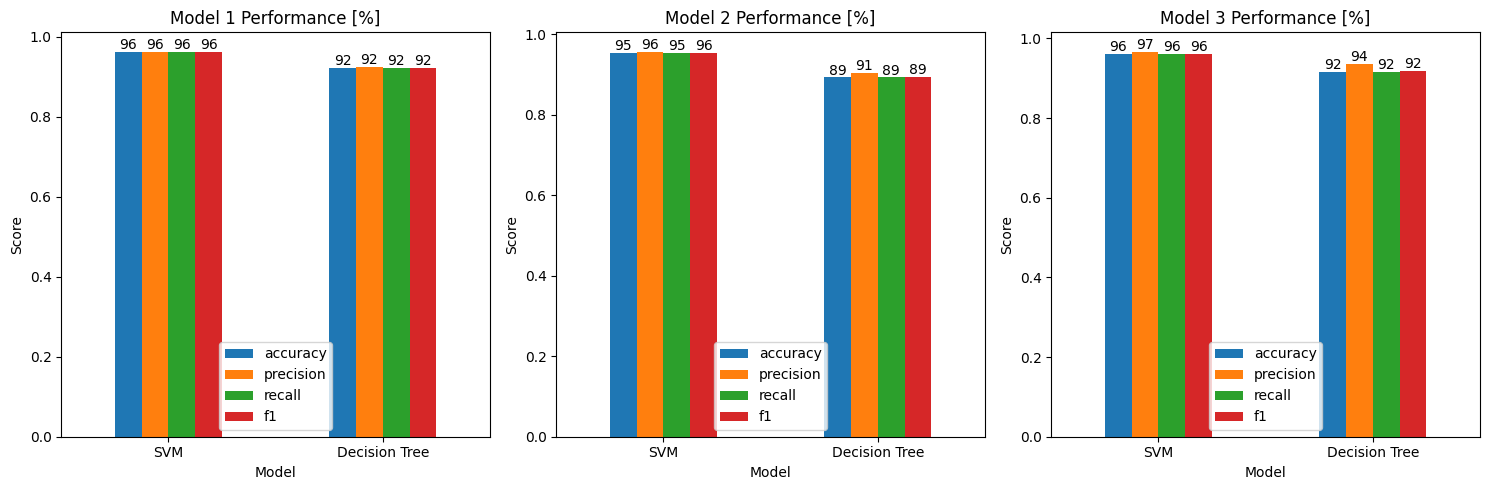

In [38]:
examine_params(svm_params, dt_params)

SVM Params:
	Kernel: sigmoid
	C: 10.0
	Max Iter: 100000

Decision Tree Params:
	Max Depth: 5
	Criterion: entropy
	Splitter: best


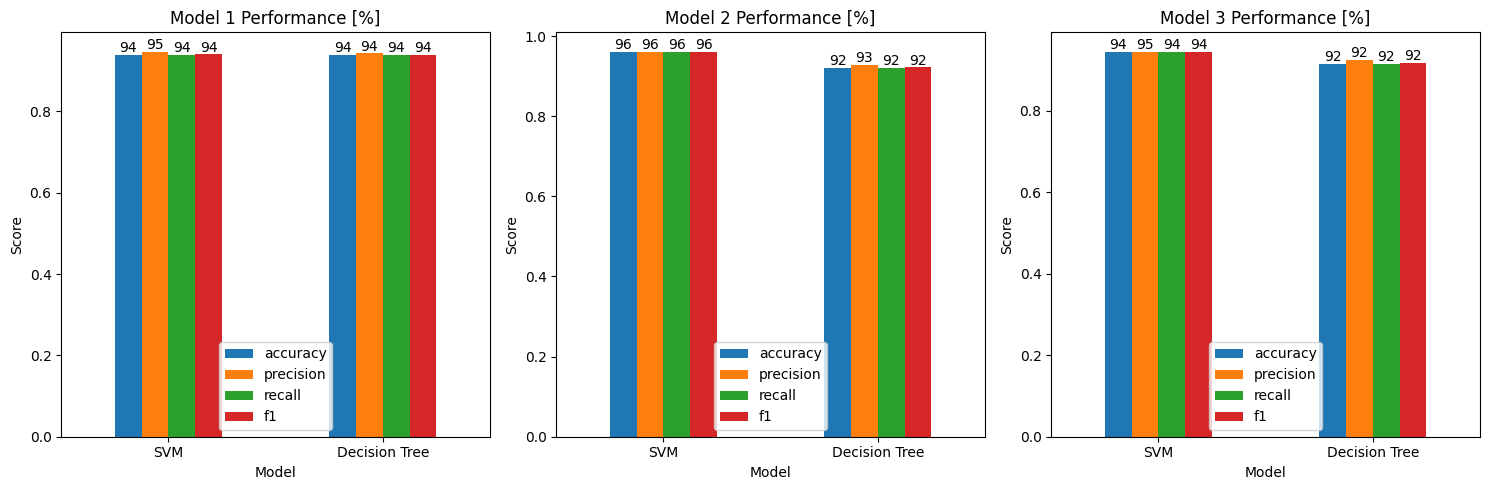

In [39]:
examine_params(svm_params, dt_params)

SVM Params:
	Kernel: poly
	C: 0.1
	Max Iter: 100000

Decision Tree Params:
	Max Depth: 10
	Criterion: entropy
	Splitter: random


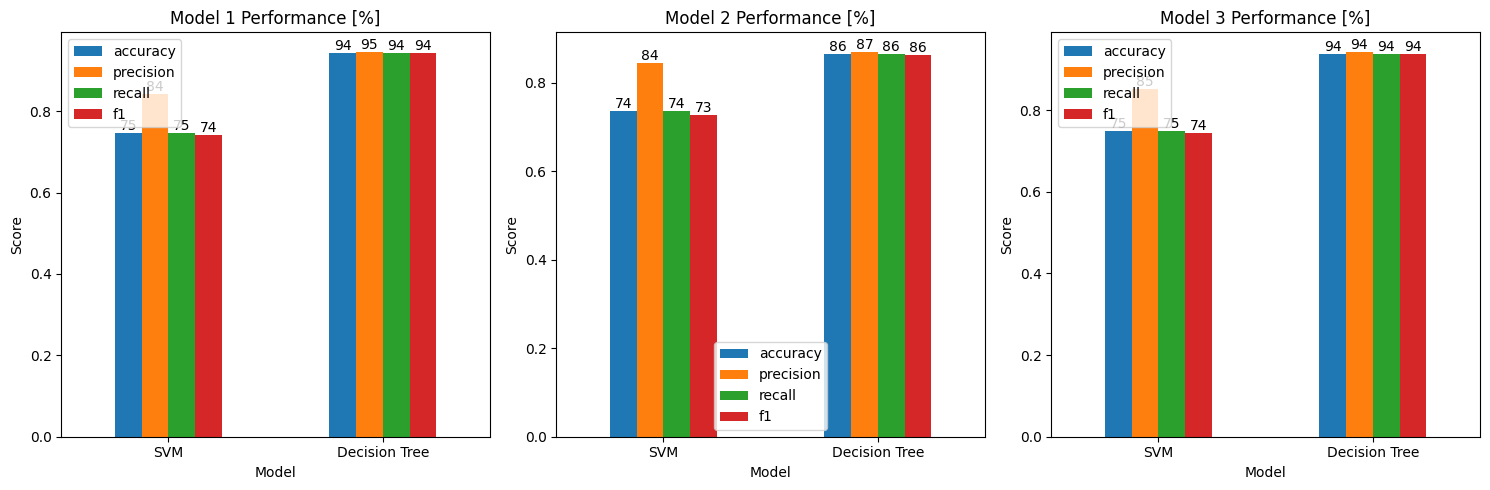

In [40]:
examine_params(svm_params, dt_params)

SVM Params:
	Kernel: poly
	C: 1.0
	Max Iter: 1000

Decision Tree Params:
	Max Depth: 10
	Criterion: entropy
	Splitter: random


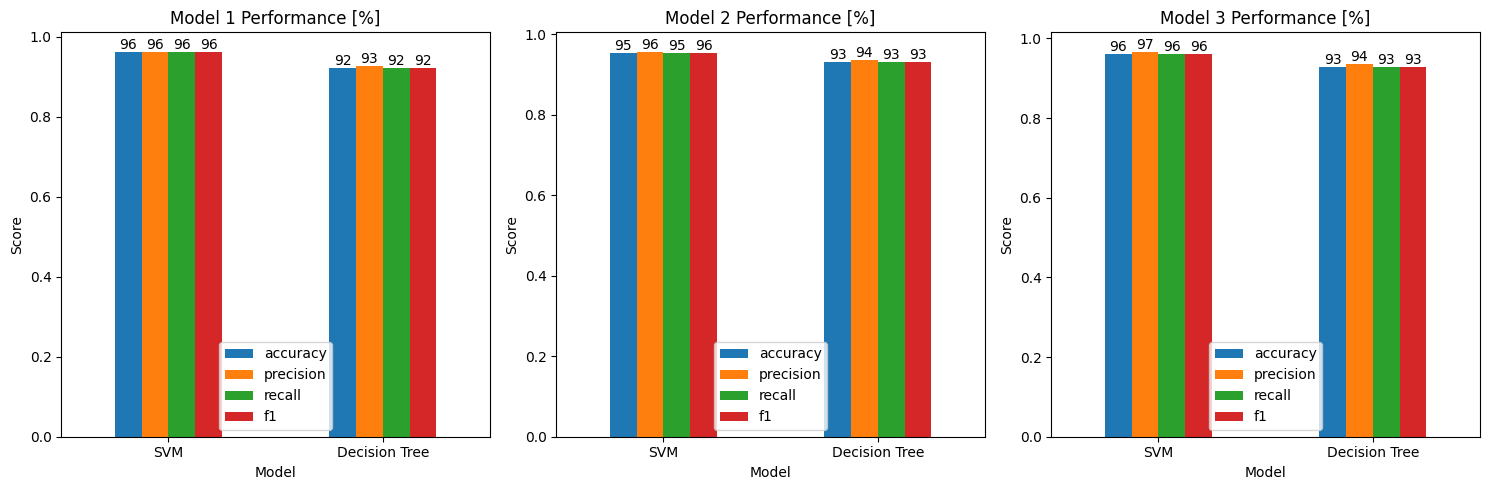

In [42]:
examine_params(svm_params, dt_params)

SVM Params:
	Kernel: rbf
	C: 10.0
	Max Iter: -1

Decision Tree Params:
	Max Depth: 10
	Criterion: entropy
	Splitter: best


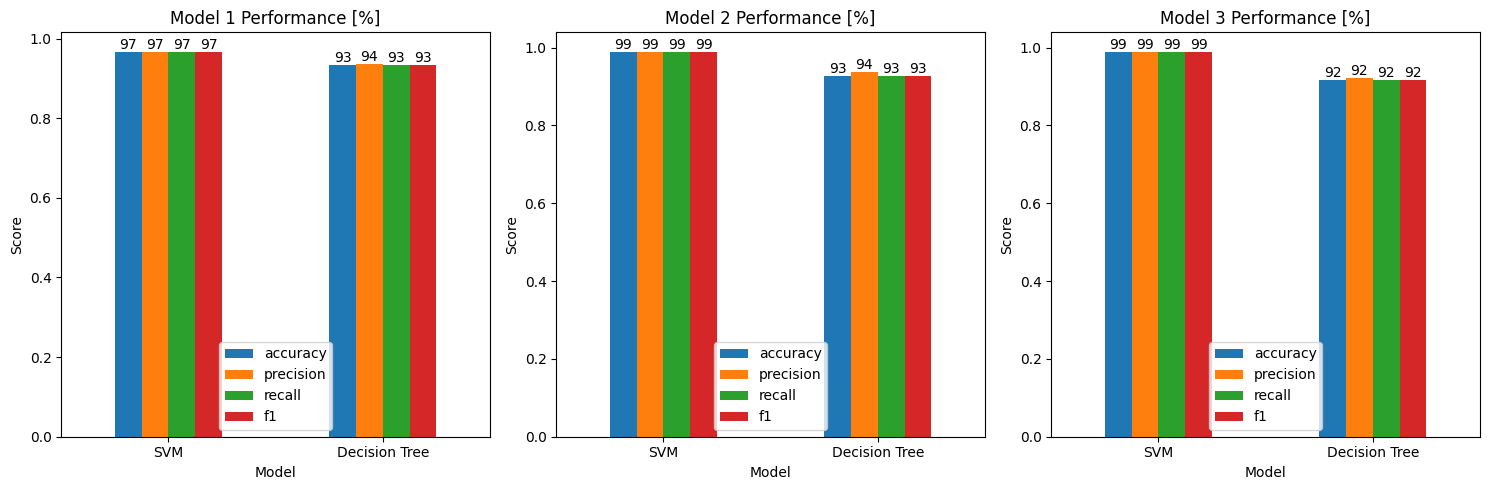

In [43]:
examine_params(svm_params, dt_params)

## Find the best model

In [50]:
models = {
    'SVM': SVC(
        kernel='rbf',
        C=1,
        max_iter=-1
    ),
    'Decision Tree': DecisionTreeClassifier(
        max_depth=5,
        criterion='entropy',
        splitter='best'
    )
}

SVM Params:
	Kernel: rbf
	C: 1
	Max Iter: -1

Decision Tree Params:
	Max Depth: 5
	Criterion: entropy
	Splitter: best


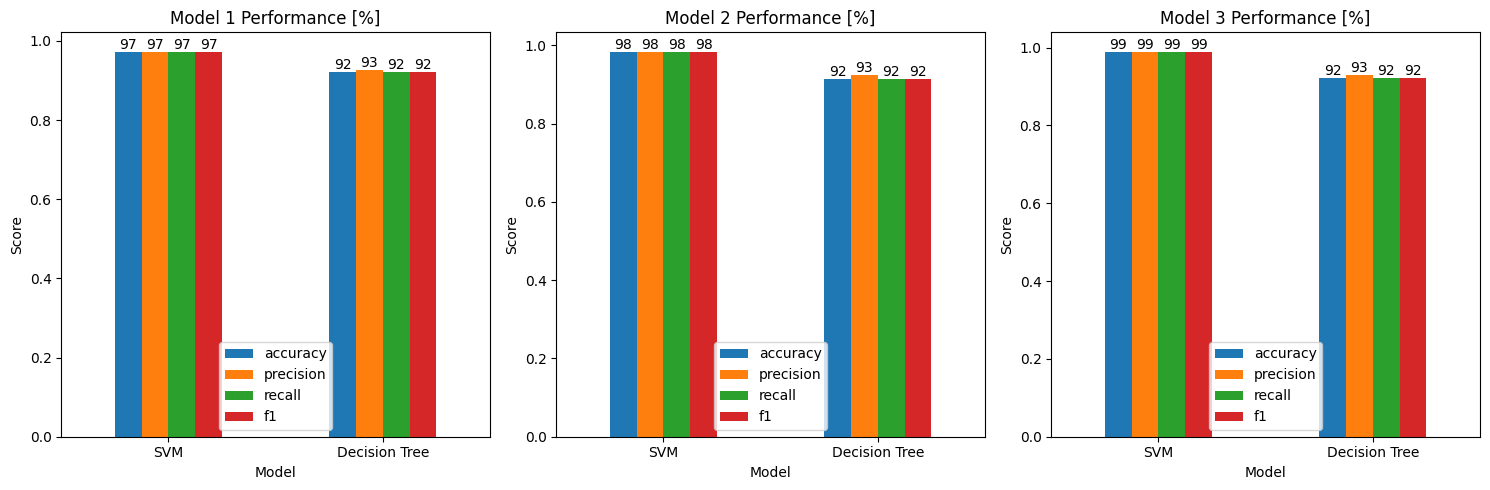

In [51]:
results = get_results(models, X, y)
show_results(results)